In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


Modelling

In [3]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

In [4]:
df=pd.read_csv("data\stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


predicting math score 

Preparing X and Y variables

In [6]:
X=df.drop(columns=["math_score"],axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [7]:
y=df["math_score"]

In [8]:
print("Categories in gender variable:   ",end=" ")
print(df["gender"].unique())
print()

print("Categories in race_ethnicity variable   :",end=" ")
print(df["race_ethnicity"].unique())
print()

print("Categories in parental_level_of_education   :",end=" ")
print(df["parental_level_of_education"].unique())
print()

print("Categories in lunch variable   :",end=" ")
print(df["lunch"].unique())
print()

print("Categories in test_preparation_course variable :",end=" ")
print(df["test_preparation_course"].unique())

Categories in gender variable:    ['female' 'male']

Categories in race_ethnicity variable   : ['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental_level_of_education   : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch variable   : ['standard' 'free/reduced']

Categories in test_preparation_course variable : ['none' 'completed']


Creating column transformer with 3 types of transformers

In [9]:
num_features=X.select_dtypes(exclude="object").columns
cat_features=X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OnehotEncoder",oh_transformer,cat_features),
        ("StandardScalar",numeric_transformer,num_features)
    ]
)

In [10]:
len(num_features)

2

In [11]:
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [11]:
X=preprocessor.fit_transform(X)

In [23]:
'''import numpy as np 
import sys 
np.set_printoptions(threshold=sys.maxsize)
'''
# To view the array completely you can add this code
#X

'import numpy as np \nimport sys \nnp.set_printoptions(threshold=sys.maxsize)\n'

In [12]:
# here we can see that increase in number of columns 
X.shape

(1000, 19)

In [13]:
type(X)

numpy.ndarray

Seperate dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
X_train.shape

(800, 19)

In [19]:
y_train.shape

(800,)

In [20]:
X_test.shape

(200, 19)

Create an Evaluation Function to give all metrices after model training

In [16]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    #mse=mean_squared_error(true,predicted)
    #rmse=np.sqrt(mse)
    r2score=r2_score(true,predicted)
    return mae,r2score

MODELS

In [17]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbours Regressor":KNeighborsRegressor(),
    "Decision Tree Regressor":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False),
    "AdaBoostRegressor":AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)
    

    #Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    #Evaluate Train and test dataset
    model_train_mae,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_r2=evaluate_model(y_test,y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    
    print('Model Perfomance for training set')
    print("--Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("R2 score: {:.4f}".format(model_train_r2))

    
    print("-----------------------------")
    
    print('Model Perfomance for test set')
    print("--Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("R2 score: {:.4f}".format(model_test_r2))
    r2_list.append((list(models.keys())[i],model_test_r2))

    print("="*32)
    print("\n")




Linear Regression
Model Perfomance for training set
--Mean Absolute Error: 4.2667
R2 score: 0.8743
-----------------------------
Model Perfomance for test set
--Mean Absolute Error: 4.2148
R2 score: 0.8804


Lasso
Model Perfomance for training set
--Mean Absolute Error: 5.2063
R2 score: 0.8071
-----------------------------
Model Perfomance for test set
--Mean Absolute Error: 5.1579
R2 score: 0.8253


Ridge
Model Perfomance for training set
--Mean Absolute Error: 4.2650
R2 score: 0.8743
-----------------------------
Model Perfomance for test set
--Mean Absolute Error: 4.2111
R2 score: 0.8806


K-Neighbours Regressor
Model Perfomance for training set
--Mean Absolute Error: 4.5167
R2 score: 0.8555
-----------------------------
Model Perfomance for test set
--Mean Absolute Error: 5.6210
R2 score: 0.7838


Decision Tree Regressor
Model Perfomance for training set
--Mean Absolute Error: 0.0187
R2 score: 0.9997
-----------------------------
Model Perfomance for test set
--Mean Absolute Error:

In [18]:
r2_list

[('Linear Regression', 0.8804332983749565),
 ('Lasso', 0.8253197323627853),
 ('Ridge', 0.8805931485028737),
 ('K-Neighbours Regressor', 0.7838129945787431),
 ('Decision Tree Regressor', 0.7332932245794335),
 ('Random Forest Regressor', 0.8507333848294072),
 ('XGBRegressor', 0.8277965784072876),
 ('CatBoostRegressor', 0.8516318920747058),
 ('AdaBoostRegressor', 0.8465521361998061)]

In [19]:
pd.DataFrame(r2_list,columns=["model Name","R2 score"]).sort_values(by=["R2 score"],ascending=False)

,model Name,R2 score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoostRegressor,0.851632
5,Random Forest Regressor,0.850733
8,AdaBoostRegressor,0.846552
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbours Regressor,0.783813
4,Decision Tree Regressor,0.733293


LINEAR REGRESSION

In [21]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f "%score)

Accuracy of the model is 88.04 


PLOT Y_PRED and Y_TEST

Text(0, 0.5, 'Predicted Values')

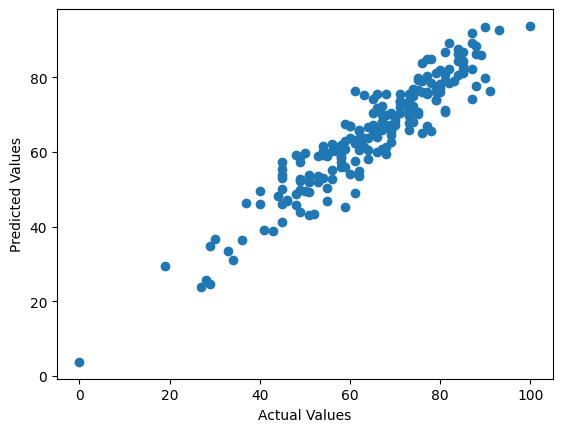

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<Axes: xlabel='math_score'>

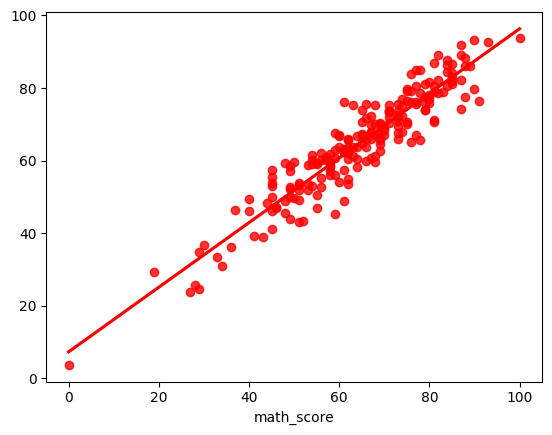

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color="red")

In [24]:
X_train.shape,y_train.shape

((800, 19), (800,))